In [1]:
import __init__
import os
import ast  # for safely evaluating string representations of lists
from utils import comp_metrics, get_callbacks
from pathlib import Path
import tensorflow as tf
from data import load_data
from utils import comp_metrics, describe_model_architecture
import numpy as np
import json

In [2]:
version = 'v3'
dir_path = '.'
data_path = str(Path(dir_path) /  'input/stocks_step4.csv')
output_path = str(Path(dir_path) /  f'output/{version}')
model_path = str(Path(output_path) /  'model')

In [7]:
# Daten laden
td, vd = load_data(data_path, window_size=30)

In [8]:
# Load the saved model
loaded_model = tf.keras.models.load_model(model_path)

In [9]:
# Print layer details
print(json.dumps(describe_model_architecture(loaded_model), indent=2))

[
  {
    "name": "lstm_2",
    "type": "LSTM",
    "units": 128
  },
  {
    "name": "dropout_2",
    "type": "Dropout",
    "dropout_rate": 0.2
  },
  {
    "name": "lstm_3",
    "type": "LSTM",
    "units": 64
  },
  {
    "name": "dropout_3",
    "type": "Dropout",
    "dropout_rate": 0.4
  },
  {
    "name": "dense_2",
    "type": "Dense",
    "units": 32
  },
  {
    "name": "dense_3",
    "type": "Dense",
    "units": 1
  }
]


Predicting AAPL...
Metrics for AAPL
Mean Absolute Error (MAE): 1.3918850421905518
Mean Squared Error (MSE): 3.525270700454712
Accuracy: 98.63%


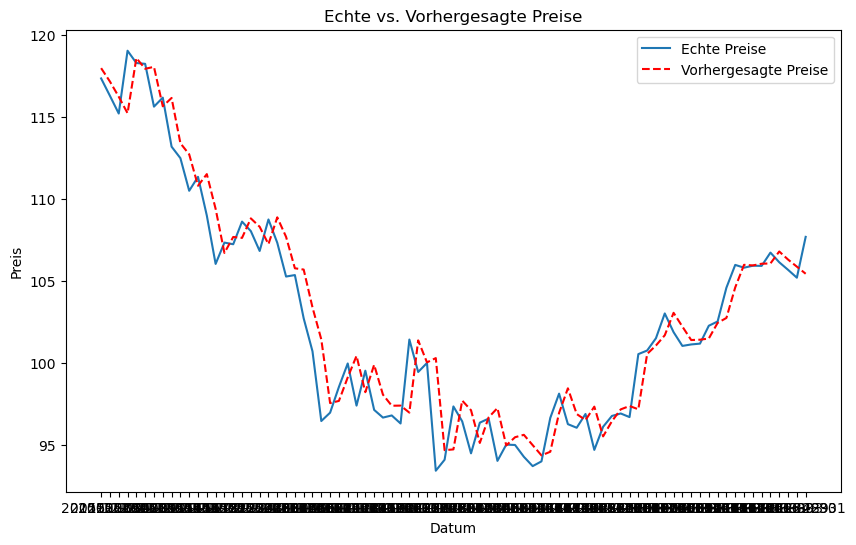

Predicting AMZN...
Metrics for AMZN
Mean Absolute Error (MAE): 10.297567367553711
Mean Squared Error (MSE): 221.59030151367188
Accuracy: 98.25%


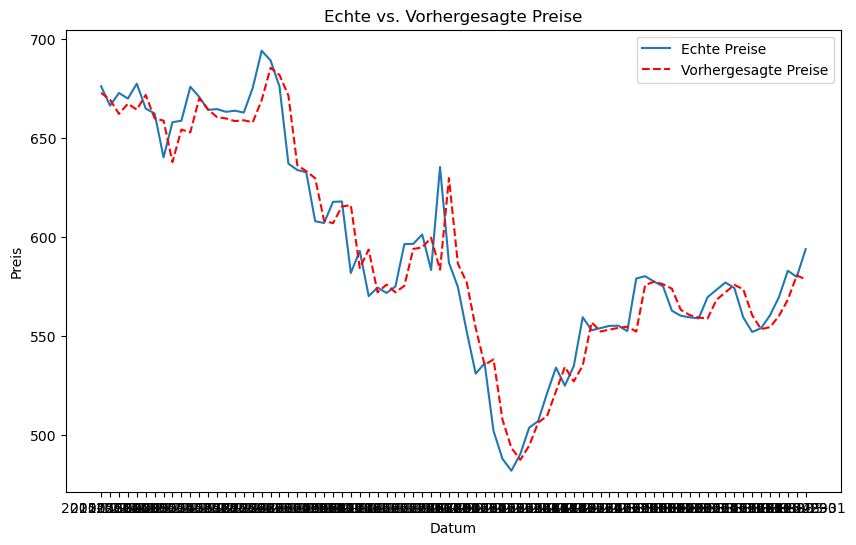

Predicting CSCO...
Metrics for CSCO
Mean Absolute Error (MAE): 0.36094218492507935
Mean Squared Error (MSE): 0.22685852646827698
Accuracy: 98.58%


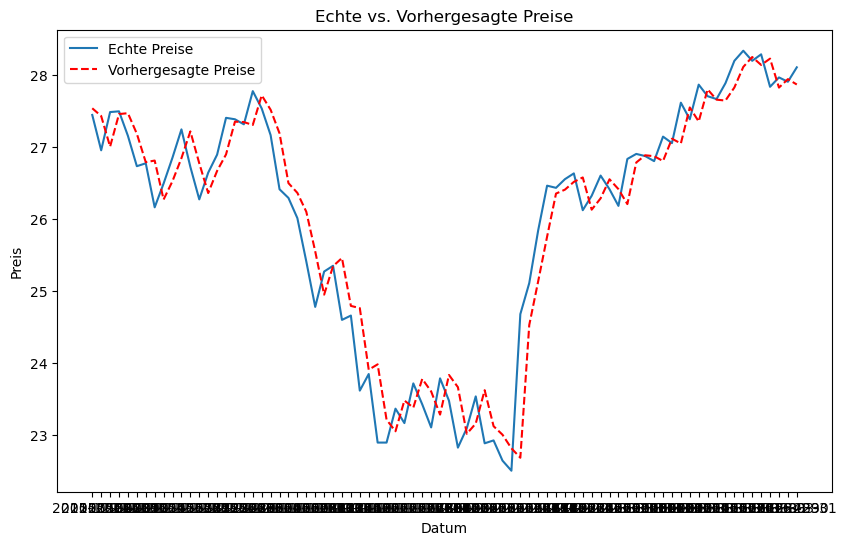

Predicting FB...
Metrics for FB
Mean Absolute Error (MAE): 1.742366075515747
Mean Squared Error (MSE): 6.689969062805176
Accuracy: 98.35%


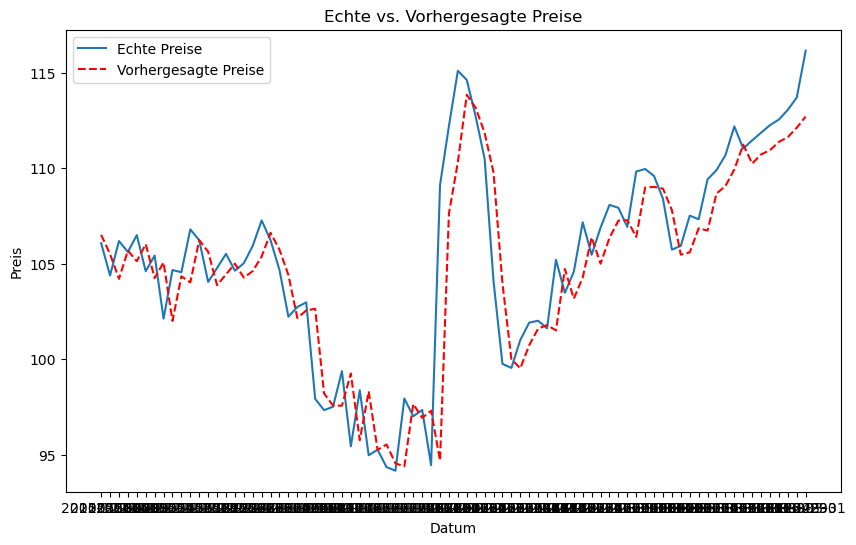

Predicting GOOG...
Metrics for GOOG
Mean Absolute Error (MAE): 8.937904357910156
Mean Squared Error (MSE): 136.83546447753906
Accuracy: 98.77%


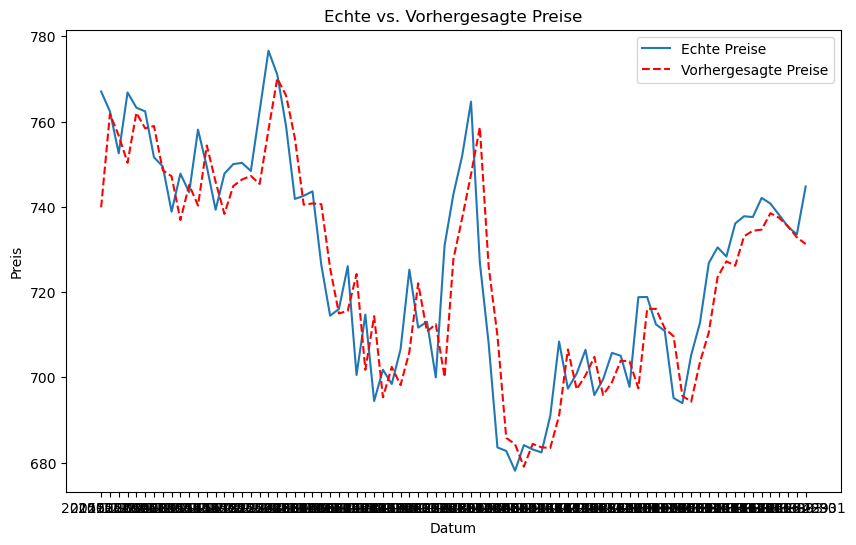

Predicting INTC...
Metrics for INTC
Mean Absolute Error (MAE): 0.4108606278896332
Mean Squared Error (MSE): 0.33092957735061646
Accuracy: 98.69%


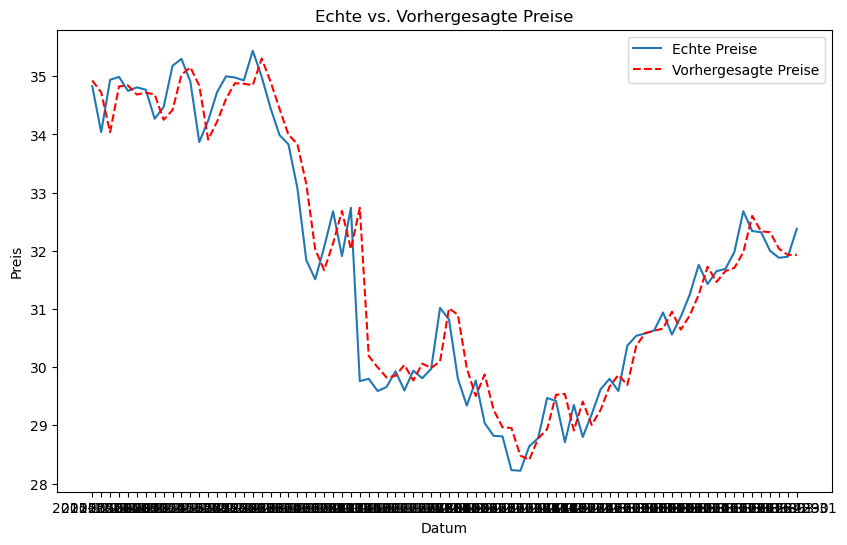

Predicting KO...
Metrics for KO
Mean Absolute Error (MAE): 0.3124757707118988
Mean Squared Error (MSE): 0.157507061958313
Accuracy: 99.28%


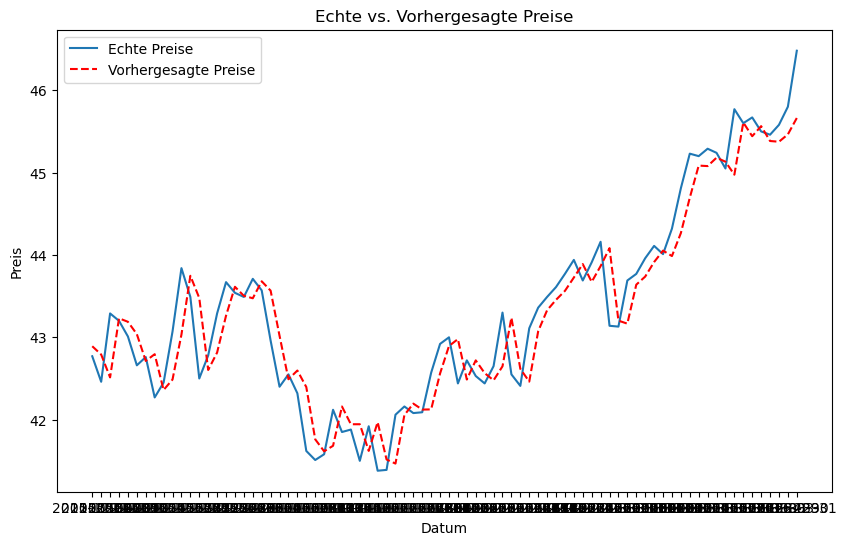

Predicting MA...
Metrics for MA
Mean Absolute Error (MAE): 1.1920735836029053
Mean Squared Error (MSE): 2.4024016857147217
Accuracy: 98.67%


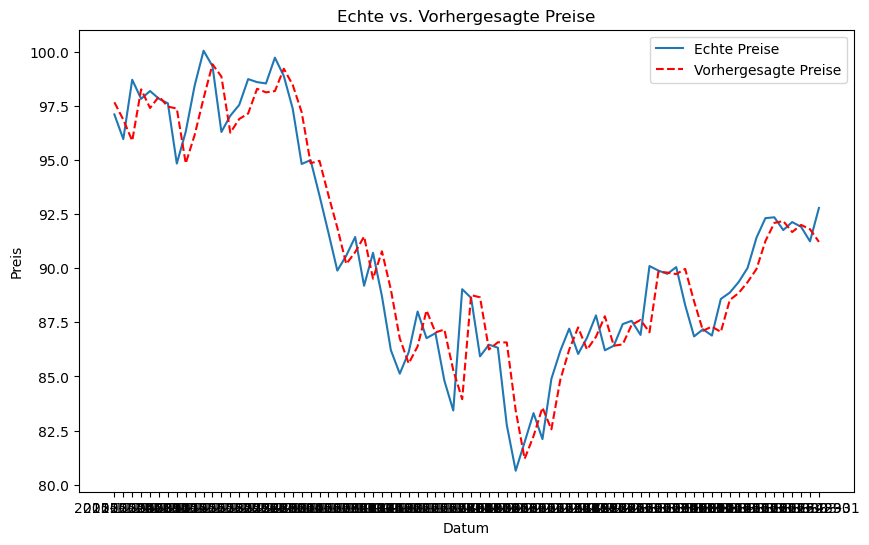

Predicting MSFT...
Metrics for MSFT
Mean Absolute Error (MAE): 0.7277086973190308
Mean Squared Error (MSE): 0.8334449529647827
Accuracy: 98.63%


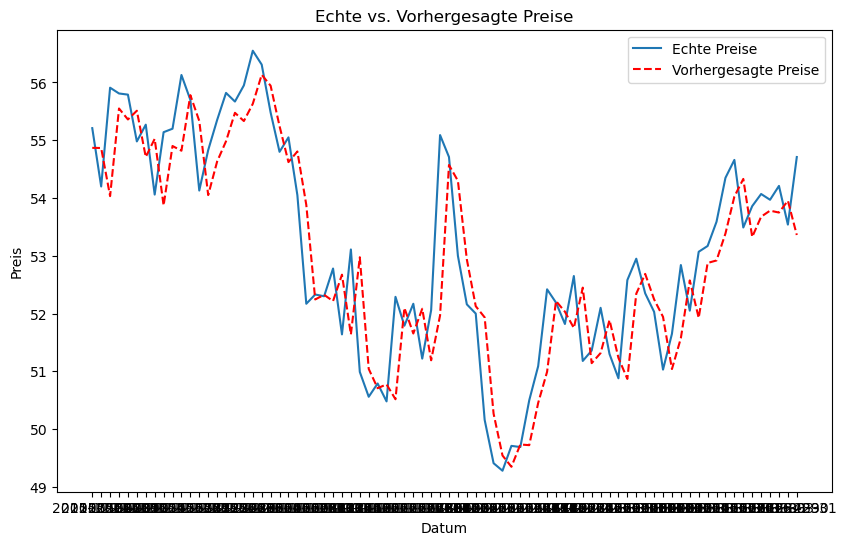

Predicting ORCL...
Metrics for ORCL
Mean Absolute Error (MAE): 0.46559301018714905
Mean Squared Error (MSE): 0.37429729104042053
Accuracy: 98.74%


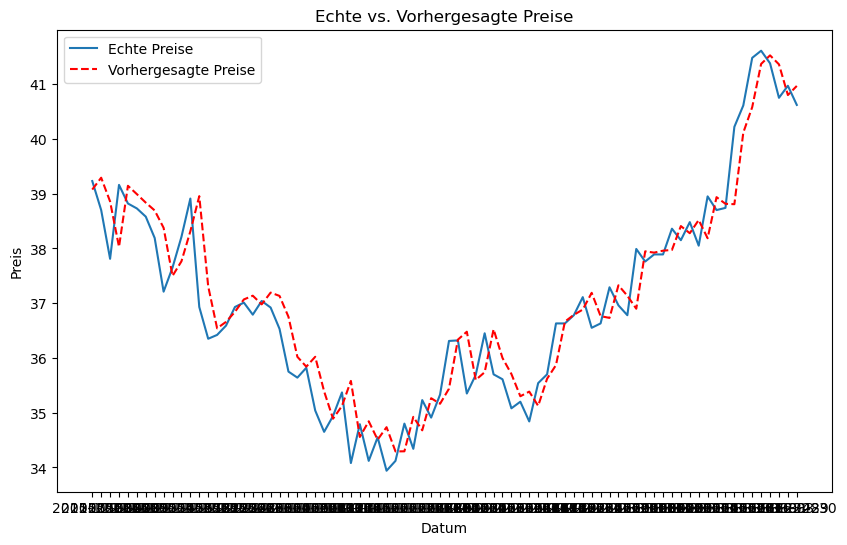

In [10]:
for i in range(len(vd)):
    stock_vd = vd[i]
    scaler = stock_vd['scaler']
    stock_name = stock_vd['stock']
    df = stock_vd['df']
    
    X = []
    y = []
    for i in range(len(stock_vd['val_data'])):
        data = stock_vd['val_data'][i]
        X.append(data[0])
        y.append(data[1])
        
    X = np.array(X)
    y = np.array(y)
    
    print(f'Predicting {stock_name}...')
    y_pred = loaded_model.predict(X)
    print(f'Metrics for {stock_name}')
    comp_metrics(scaler, y, y_pred, df)